In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [2]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0

In [3]:
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [4]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu')) # sigmoid
model.add(keras.layers.Dropout(0.3)) # 30%를 제외시키는 규제적용
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마 loss,accuracy 값을 저장
# train_scaled,val_scaled 함께 훈련시킴.
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7285 - loss: 0.7831 - val_accuracy: 0.8388 - val_loss: 0.4413
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8338 - loss: 0.4573 - val_accuracy: 0.8531 - val_loss: 0.4048
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8506 - loss: 0.4130 - val_accuracy: 0.8687 - val_loss: 0.3610
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8599 - loss: 0.3882 - val_accuracy: 0.8692 - val_loss: 0.3584
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8619 - loss: 0.3753 - val_accuracy: 0.8750 - val_loss: 0.3448
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8736 - loss: 0.3476 - val_accuracy: 0.8708 - val_loss: 0.3510
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8733 - loss: 0.3475 - val_accuracy: 0.8769 - val_loss: 0.3358
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8742 - loss: 0.3383 - 

Text(0, 0.5, 'loss')

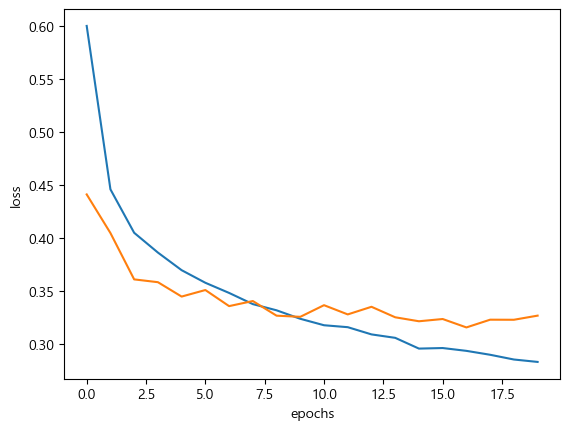

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

콜백

In [8]:
# 손실률이 가장 낮은 위치의 모델을 저장시켜줌.
# 확장자 h5, keras확장자명 변경
# epochs를 20번 돌때 가장 좋은 모델을 저장시켜줌.
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb] )

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8965 - loss: 0.2718 - val_accuracy: 0.8854 - val_loss: 0.3251
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8971 - loss: 0.2766 - val_accuracy: 0.8854 - val_loss: 0.3229
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8979 - loss: 0.2671 - val_accuracy: 0.8897 - val_loss: 0.3189
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8989 - loss: 0.2644 - val_accuracy: 0.8894 - val_loss: 0.3206
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9010 - loss: 0.2619 - val_accuracy: 0.8892 - val_loss: 0.3170
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9016 - loss: 0.2644 - val_accuracy: 0.8880 - val_loss: 0.3239
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8999 - loss: 0.2642 - val_accuracy: 0.8883 - val_loss: 0.3261
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9064 - loss: 0.2527 - 

In [11]:
model = keras.models.load_model('best_model.keras')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.evaluate(val_scaled,val_target)

ValueError: A total of 1 objects could not be loaded. Example error message for object <keras.src.optimizers.adam.Adam object at 0x000001C644FBE540>:

'Unable to synchronously open object (bad object header version number)'

List of objects that could not be loaded:
[<keras.src.optimizers.adam.Adam object at 0x000001C644FBE540>]